# Fundamental analysis for the Canadian stock market
*Samuel Mercier, March 2018*

Here are a few examples of the analyses we can perform using the "extract_stock_information" module. The module contains a class *Stock*, which creates an object describing the fundamental indicators of a given ticker, and a class *Sector*, which can be used to analyse all stocks in a given sector and find undervalued investment opportunities. 

In [ ]:
import Stock_Sector_Module as SSM

## Extracting fundamental indicators
Let's first extract the fundamental indicators of a stock. To do so, we need to provide the ticker of the stock - in this example, let's consider the stock Metro inc. (ticker MRU), a Canadian food retailer. To create a new instance for this stock, we just need to pass the ticker to the *Stock* class

In [2]:
ticker = 'MRU'
MRU = SSM.Stock(ticker)

We can extract the fundamental indicators for our stock using the **get_key_stats()** method. The method will grab the fundamental indicators from Yahoo! finance, and store them in a *Key_index dictionary*. The fundamental indicators extracted by the method are:
 - *Current_ratio*: Current assets / current liabilities
 - *D/E*: Total debt / equity
 - *Dividend_t*: Trailing annual dividend yield
 - *EPS*: Diluted earnings per share
 - *Op_margin*: Operating margin
 - *P/B*: Price-to-book ratio
 - *PEG*: Price/Earnings to growth ratio (5 year expected)
 - *PE_t*: Trailing price-earnings ratio
 - *PE_f*: Forward price-earnings ratio
 - *PR*: Payout ratio
 - *QEG*: Quaterly earnings growth
 - *QRG*: Quaterly revenue growth
 - *ROE*: Return on equity
 - *SR*: Short ratio

In [3]:
MRU.get_key_stats()
MRU.Key_stats

{'Current_ratio': 2.4,
 'D/E': 67.83,
 'Dividend_t': 1.67,
 'EPS': 7.65,
 'Op_margin': 5.8,
 'P/B': 2.16,
 'PEG': 1.89,
 'PE_f': 13.36,
 'PE_t': 5.2,
 'PR': 8.49,
 'QEG': 864.3,
 'QRG': 4.7,
 'ROE': 49.04,
 'SR': 6.77}

## Extracting analysts' estimates
We can extract information on the analysts' coverage of our stock using the **analysts()** method. The method will extract information on the buy rating (1-strong buy to 5-strong sell), price target (*PT*), difference between the price target and current price (*PT_diff*) and the number of analysts covering the stock (*Nb_analysts*). These values are stored in the *Key_stats* dictionary.

In [4]:
MRU.analysts()
MRU.Key_stats

{'Buy_rating': 2.6,
 'Current_ratio': 2.4,
 'D/E': 67.83,
 'Dividend_t': 1.67,
 'EPS': 7.65,
 'Nb_analysts': 9.0,
 'Op_margin': 5.8,
 'P/B': 2.16,
 'PEG': 1.89,
 'PE_f': 13.36,
 'PE_t': 5.2,
 'PR': 8.49,
 'PT': 46.0,
 'PT_diff': 15.54885707108766,
 'QEG': 864.3,
 'QRG': 4.7,
 'ROE': 49.04,
 'SR': 6.77}

The analysts thus currently predict a price of 46$ for the stock, 15.5% above the current price. The current price (*CP*), along with the 52-week high (*52_high*) and low (*52_low*) prices, 52-week price change (*52_change*), and 50 (*50ma*) and 200 (*200ma*) day moving averages, can be found in the *price* dictionary:

In [5]:
MRU.price

{'200ma': 40.79,
 '50ma': 40.36,
 '52_change': -3.82,
 '52_high': 47.41,
 '52_low': 38.32,
 'CP': 39.81}

## Plotting the historical price
The historical price of the stock can be plotted on a candlestick chart using the **get_charts()** method. The method takes three optional arguments, *start*, which describes the date (format (year, month, day)) from which we want to begin the plot, *candles_size*, which describes the number of days covered by each candle, and *moving_average*, describing the window of the price moving average added to the plot.

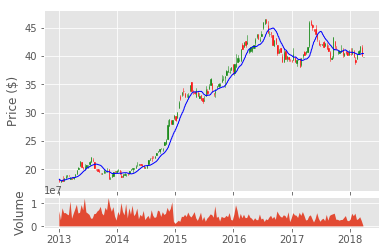

In [6]:
#Let's plot the price and volume exchanged for Metro since January 2013, 
#along with the 50-day moving average and candles covering 10-day periods
MRU.get_charts(start=(2013, 1, 1), candles_size=10, moving_average=50)

## Comparing stocks with other companies in the same sector
We can use the module to compare a stock with the other companies in the same sector. The sector of our stock can be found by calling the *sector* attribute.

In [7]:
MRU.sector

'Consumer Defensive'

Metro is thus classified in the Consumer Defensive sector. Metro can be compared with its peers by calling the **rank_of_stock()** method. The method takes one argument, *metrics*, which is the list of fundamental indicators we want to look at.

In [9]:
#Let's compare Metro to the other stocks in the same sector with respect 
#to its trailing price-earnings ratio (PE_t), forward price-earnings ratio (PE_f), 
#price/earnings to growth ratio (PEG), operating margin (Op_margin) and the 
#difference between the analysts' price target and the current price (PT_diff)
metrics = ['PE_t', 'PE_f', 'PEG', 'Op_margin', 'PT_diff']
MRU.rank_of_stock(metrics)

The **rank_of_stock()** method saves the rank of our stock, with respect to its peers, in the *rank* attribute.

In [21]:
MRU.rank

{'Op_margin': '6.0',
 'PEG': '7.0',
 'PE_f': '4.0',
 'PE_t': '1.0',
 'PT_diff': '6.0'}

As can be seen, Metro currently has the lowest trailing price-earnings ratio amongst the companies within the same sector, which could suggest an undervalued stock given its current earnings and a buy opportunity. However, three other stocks have a lower forward price-earnings ratio, and 6 companies a lower price/earnings to growth ratio, indicating that analysts may expect a limited growth of the stock earnings over the next few years. Note that the total number of stocks within the same sector can be known by calling the *number* attribute.

In [11]:
MRU.number

12

## Finding undervalued stocks in a sector
The compagnies in a given sector can be analysed using the *Sector* class. Note that the *Stock* class inherits from the *Sector* class, meaning that all the methods discussed below can also be called directly on a stock.

The name of the different sectors follows the terminology used on Wikipedia [TSX Composite Index page](https://en.wikipedia.org/wiki/S%26P/TSX_Composite_Index). Let's say we want to look at the stocks in the 'Consumer Defensive' sector. 

In [2]:
CD = SSM.Sector('Consumer Defensive')

We can find all the stocks in the sector by calling the **get_tickers()** method. The method will store the tickers of these stocks in the *tickers* attribute.

In [13]:
CD.get_tickers()
CD.tickers

['ATD.B',
 'WEED',
 'BCB',
 'EMP.A',
 'WN',
 'PJC.A',
 'L',
 'MFI',
 'MRU',
 'PBH',
 'SAP',
 'NWC']

We have 12 stocks in this sector, including MRU, as seen before. We can extract the fundamental indicators for all these stocks using the **export_csv_data()** method. The method takes one argument, *metrics*, describing the list of fundamental indicators we are interested in.

In [14]:
CD.export_csv_data(metrics)

The **export_csv_data()** method saves the fundamental indicators of the stocks in a csv file named 'Statistics_?.csv', where "?" is the name of the sector. Let's see how this csv file looks.

In [15]:
import pandas as pd
statistics = pd.read_csv('Statistics_%s.csv' %CD.sector)
statistics.head(CD.number)

,ticker,PE_t,PE_f,PEG,Op_margin,PT_diff
0,ATD.B,20.43,18.00,0.95,4.30,6.133863
1,WEED,NaN,832.50,NaN,-63.44,-0.720721
2,BCB,NaN,40.83,NaN,3.75,-13.471778
3,EMP.A,58.62,16.41,0.54,1.86,11.360063
4,WN,18.29,13.13,1.79,5.24,19.056100
5,PJC.A,24.41,21.56,77.39,8.44,-1.149425
6,L,16.94,12.46,1.74,5.79,21.750079
7,MFI,24.92,16.52,1.93,6.79,25.275081
8,MRU,5.20,13.36,1.89,5.80,15.577889
9,PBH,42.65,22.32,1.06,6.45,-0.305037


As we can see, we have the fundamental indicators we are interested in for all the stocks in a sector within a single table, providing us with the opportunity of quickly screening for undervalued investment opportunities. The NaNs either indicate a fundamental indicator unavailable for a stock or, in the case of *PE_t*, *PE_f* and *PEG*, a negative value.

We can also rank all the stocks for these different fundamental indicators using the **rank_all_stocks()** method. The method takes one argument, *metrics*, which is as before the list of fundamental indicators we are interested in.

In [28]:
CD.rank_all_stocks(metrics)

The **rank_all_stocks()** method saves the fundamental indicators of the stocks in a csv file named 'Rank_?.csv', where "?" is the name of the sector. Let's see how it looks.

In [29]:
Ranks = pd.read_csv('Rank_%s.csv' %CD.sector)
Ranks.head(CD.number)

,ticker,PE_t,PE_f,PEG,Op_margin,PT_diff
0,ATD.B,6.0,7.0,2.0,9.0,8.0
1,WEED,NaN,12.0,NaN,12.0,10.0
2,BCB,NaN,11.0,NaN,10.0,12.0
3,EMP.A,10.0,5.0,1.0,11.0,7.0
4,WN,4.0,2.0,6.0,8.0,3.0
5,PJC.A,7.0,9.0,10.0,2.0,11.0
6,L,2.0,1.0,5.0,7.0,2.0
7,MFI,8.0,6.0,8.0,3.0,1.0
8,MRU,1.0,4.0,7.0,6.0,6.0
9,PBH,9.0,10.0,3.0,4.0,9.0


Just as we saw before, we can see that Metro (ticker MRU) has the best (lowest) training price-earnings ratio, but other stocks in the same sector look more undervalued with respect to the other fundamental indicators.

The stock with the best average ranking can be found by calling the **identify_best_stock()** method, which also takes one argument, *metrics*, the list of fundamental indicators we are interested in.

In [30]:
CD.identify_best_stock(metrics)
CD.best_stock

('L', [3.4])

The five fundamental indicators considered thus suggest that Loblaws (ticker L) may currently be the most undervalued stock amongst its peers, as it has the lowest price/earnings to growth ratio (%PEG%), second lowest trailing price-earnings ratio (%PE_t%) and second highest difference between analyst's price target and the stock current price (%PT_diff%). On average, Loblaws has a 3.4 ranking for the five fundamental indicators considered, the lowest aggregated ranking amongst its peers. 

Finally, some additional basic statistics (average, median and best) can be obtained for each fundamental indicator by running the **get_average_best()** method, and then calling the *average*, *median* and *best* attributes.

In [31]:
CD.get_average_best(metrics)

In [32]:
CD.average

{'Op_margin': 0.02916666666666649,
 'PEG': 9.103,
 'PE_f': 86.59333333333332,
 'PE_t': 24.871000000000002,
 'PT_diff': 9.734183150755738}

In [33]:
CD.median

{'Op_margin': ['MRU', 5.8],
 'PEG': ['L', 1.74],
 'PE_f': ['ATD.B', 18.01],
 'PE_t': ['WN', 18.29],
 'PT_diff': ['MRU', 15.57788944723619]}

In [34]:
CD.best

{'Op_margin': ['SAP', 9.28],
 'PEG': ['ATD.B', 0.95],
 'PE_f': ['L', 12.45],
 'PE_t': ['ATD.B', 20.45],
 'PT_diff': ['MFI', 25.194049159120308]}

As we can see, in the Consumer Defensive sector, the price of the stocks is on average of 9.7% below the analysts' average price target (*PT_diff*), Alimentation Couche-Tard (ticker ATD.B) has the median forward price-earnings ratio (*PE_f*), and Saputo (ticker SAP) holds the best operating margin, at 9.28% 

With this module, you can thus quickly get an overview of the stocks on the Canadian stock market for each sector, and find companies looking undervalued with respect to your favorite fundamental indicators. However, obviously, you may want to dig deeper into each stock before investing in them, and should always remain aware of the risks associated with any investment in the stock market. With that said, happy stock hunting!